# AML 2304-Natural Language Processing
## NLP Final Project


## Submitted By: Vengie Candar Dinampo (c0849806)

# Overview

The Consumer Financial Protection Bureau (CFPB) is a federal agency in the United States that acts as a middleman in disputes between financial institutions and consumers. Customers can send the agency a narrative of their dispute via a web form.

This project created Natural Language Processing (NLP) machine learning models to process the text of the narratives and classify the complaints into one of five categories.


The following is the major tasks to Pipelines that needs to be performed:

- Data Preprocesing
    - Data loading
    - Understanding of data dimension
    - Data Visualization
- Data Cleaning
    - Text preprocessing
- Exploratory data analysis (EDA)
- Feature extraction (Vectorize data)
- Create and tranform features
- Building Model 
- Prediction and evaluate results
- Final model selection

# Problem Statement
An NLP model would be more efficient than manually tagged complaints in terms of classification and routing to the appropriate teams.

- Issue: The Consumer Financial Protection Bureau sends thousands of consumer complaints about financial products and services to companies each week for response. Using the complaint description, classify those consumer complaints into the product category to which they belong.
- Solution: The project's goal is to categorise the complaint into a specific product category. Because there are multiple categories, it becomes a multiclass classification that can be solved by many machine learning algorithms. Once the algorithm is in place, whenever a new complaint comes in, it can easily categorise  and direct it to the appropriate person. This will save a lot of time.

# About the Data
It's a unstructured data file was downloaded directly from the CFPB website for training and testing the model. It included one year's worth of data (March 2020 to March 2021).

The dataset has 205078 of rows and 18 columns.


# Attribute information

#### Field	name	Description	Data Type
1. Date received:	The date the CFPB received the complaint	date & time	
2. Product:	The type of product the consumer identified in the complaint	plain text	This field is a categorical variable.
3. Sub-product:	The type of sub-product the consumer identified in the complaint	plain text	This field is a categorical variable. Not all Products have Sub-products.
4. Issue:	The issue the consumer identified in the complaint	plain text	This field is a categorical variable. Possible values are dependent on Product.
5. Sub-issue:	The sub-issue the consumer identified in the complaint	plain text	This field is a categorical variable. Possible values are dependent on product and issue. Not all Issues have corresponding Sub-issues.
6. Consumer complaint: 	Consumer complaint narrative is the consumer-submitted description of "what happened" from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer.	plain text	Consumers' descriptions of what happened are included if consumers consent to publishing the description and after we take steps to remove personal information.
7. Company public response:	The company's optional, public-facing response to a consumer's complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, "Company believes complaint is the result of an isolated error."	plain text	Companies' public-facing responses to complaints are included if companies choose to publish one. Companies may select a public response from a set list of options as soon as they respond to the complaint, but no later than 180 days after the complaint was sent to the company for response.
8. Company:	The complaint is about this company	plain text	This field is a categorical variable.
9. State:	The state of the mailing address provided by the consumer	plain text	This field is a categorical variable.
10. ZIP code:	The mailing ZIP code provided by the consumer	plain text	Mailing ZIP code provided by the consumer. This field may: i) include the first five digits of a ZIP code; ii) include the first three digits of a ZIP code (if the consumer consented to publication of their complaint narrative); or iii) be blank (if ZIP codes have been submitted with non-numeric values, if there are less than 20,000 people in a given ZIP code, or if the complaint has an address outside of the United States). For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged, ‘Older American.’ Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged, ‘Servicemember.’ Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a Veteran or retiree.
11. Tags:	Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.	plain text
12. Consumer consent provided?:	Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents and consumers can opt-out at any time.	plain text	This field shows whether 13. consumer provided consent to publish their complaint narrative
14. Submitted via: 	How the complaint was submitted to the CFPB	plain text	This field is a categorical variable.
15. Date sent to company: 	The date the CFPB sent the complaint to the company	date & time	
16. Company response to consumer: 	This is how the company responded. For example, "Closed with explanation."	plain text	This field is a categorical variable.
17. Timely response?: 	Whether the company gave a timely response	plain text	yes/no
18. Complaint ID:	The unique identification number for a complaint	number	

# 1. Data Preprocessing
## 1.1 Data loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
#set max row to display the entire text
# pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)


filename = 'customer_complaints.tsv'
df = pd.read_csv(filename,low_memory=False,on_bad_lines='skip',sep='\t', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,"AmeriHome Mortgage Company, LLC",NC,28104.0,NaN,NaN,Web,2022-11-11,In progress,Yes,NaN,6190415
1,2022-11-23,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TN,37421.0,NaN,NaN,Web,2022-11-23,In progress,Yes,NaN,6236178
2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as authorized by contract or law,"Shellpoint Partners, LLC",FL,33458.0,Servicemember,NaN,Web,2022-11-16,Closed with explanation,Yes,NaN,6212558
3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,WELLS FARGO & COMPANY,MD,20814.0,NaN,Consent provided,Web,2022-11-15,Closed with explanation,Yes,NaN,6206885
4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945


In [3]:
df.columns = ['date_received','product','sub_product','issue',
                'sub_issue','complaint_what_happened','company_public_response','company',
                'state','zip_code','tags','consumer_consent_provided',
                'submitted_via','date_sent_to_company','company_response','timely',
                'consumer_disputed','complaint_id'
               ]
df.head()

,date_received,product,sub_product,issue,sub_issue,complaint_what_happened,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,complaint_id
0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,"AmeriHome Mortgage Company, LLC",NC,28104.0,NaN,NaN,Web,2022-11-11,In progress,Yes,NaN,6190415
1,2022-11-23,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TN,37421.0,NaN,NaN,Web,2022-11-23,In progress,Yes,NaN,6236178
2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as authorized by contract or law,"Shellpoint Partners, LLC",FL,33458.0,Servicemember,NaN,Web,2022-11-16,Closed with explanation,Yes,NaN,6212558
3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,WELLS FARGO & COMPANY,MD,20814.0,NaN,Consent provided,Web,2022-11-15,Closed with explanation,Yes,NaN,6206885
4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945


## 1.2 Understanding the data and it's dimension

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205078 entries, 0 to 205077
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date_received              205078 non-null  object
 1   product                    205078 non-null  object
 2   sub_product                202772 non-null  object
 3   issue                      205078 non-null  object
 4   sub_issue                  189560 non-null  object
 5   complaint_what_happened    70106 non-null   object
 6   company_public_response    95717 non-null   object
 7   company                    205078 non-null  object
 8   state                      204626 non-null  object
 9   zip_code                   204551 non-null  object
 10  tags                       19174 non-null   object
 11  consumer_consent_provided  142726 non-null  object
 12  submitted_via              205078 non-null  object
 13  date_sent_to_company       205078 non-null  

In [5]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', df.shape[0], '\033[0m')
print('No of cols:\033[1m', df.shape[1], '\033[0m')

No of rows: 205078 
No of cols: 18 


In [6]:
# Assign nan in place of blanks in the complaints column
df.complaint_what_happened.replace(r'', np.nan, regex=True, inplace=True)

# Remove all rows where complaints column is nan
df = df[df.complaint_what_happened.notna()]
print('Remaining Rows:\033[1m', len(df), '\033[0m')

Remaining Rows: 70106 


In [7]:
# Isolate relevant columns
df = df[['product', 'complaint_what_happened']]
df.head()

,product,complaint_what_happened
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees."
11,Debt collection,"XXXX is attempting to collect funds for Valuations services not provided or requested- see below. XXXX XXXX, XXXX responded to the false allegation on XX/XX/2022, and requested supporting documentation of XXXX XXXX ( Appraisal ) not provided to XXXX XXXX XXXX \n\n"" We attempted to withdraw the {$5000.00} your business owes on its XXXX XXXX XXXX account but were unsuccessful. So we added a Returned Item fee of {$25.00} to the balance owed. The new total owed is {$5000.00} and due immediately.\n\nIf youve already sent a payment, you can ignore this notice. \n\nHow your business can pay Call us at XXXX to pay over the phone by credit card or check. If you have any questions, you can also chat with us. \n\nOr Click Here to upload a completed payment coupon using our secure portal. \nIf your business can't pay the full amount, call or chat with us to talk about all your options. \n\nYou can also get help managing your business 's XXXX XXXX Payments account in our Merchant Service Center. \n\nThanks, The XXXX XXXX XXXX XXXX account : XXXX Business name : XXXX XXXX, XXXX Case number : XXXX ''"
15,"Credit reporting, credit repair services, or other personal consumer reports","Today I called to get my balance and reset my password. The credit card company did not allow me to reset my password or have a reset option sent to my email. They also reported me as not paying since XXXX. There have been several payments since XXXX, there have also been several attempts to login to no avail. The company is engaging in illegal collection and credit reporting. I have proof of payments made over the last XXXX months and have not been skipping payments."
51,"Credit reporting, credit repair services, or other personal consumer reports","The Federal Trade Commission Bureau of Consumer Protection has received numerous complaints from XXXX XXXX XXXX, DOB : XX/XX/1974. SSN : XXXX in regards to fraudulent credit card accounts, debt collection accounts and an inaccurate public record reappearing on XXXX XXXX XXXX and XXXX credit report. XXXX XXXX has sent XXXX and XXXX countless letters of dispute for the following accounts reappearing on his XXXX, and XXXX credit report : XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Bankruptcy XXXX XXXX Discharged from the U.S. District Court Minnesota Bankruptcy Court, but XXXX and XXXX has failed to take action and remove the fraudulent accounts and public record from XXXX XXXX credit report. The Federal Trade Commission is requesting for the Consumer Financial Protection Bureau to open up an immediate investigation and investigate this matter promptly with XXXX and XXXX, and send a letter of reply to XXXX XXXX on the findings of the investigation. Thank you for your prompt attention and consideration to this matter."
56,Mortgage,"We app

In [8]:
df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    45667
Debt collection                                                                  6799
Credit card or prepaid card                                                      4565
Checking or savings account                                                      3778
Mortgage                                                                         3396
Money transfer, virtual currency, or money service                               1508
Student loan                                                                     1152
Vehicle loan or lease                                                             962
Payday loan, title loan, or personal loan                                         632
Credit reporting                                                                  568
Credit card                                                                       399
Bank account or service                               

In [9]:
df['complaint_what_happened'].value_counts()

I am very concerned about the items that are being shown on my credit report. Not only are they inaccurate, they are also unjust, because they should not be reporting on my credit report! I ask that you delete these accounts, or I will be filing a legal complaint against you!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [10]:
df.shape

(70106, 2)

In [11]:
# check the distribution of complaint by category
df.groupby('product').complaint_what_happened.count()

product
Bank account or service                                                           345
Checking or savings account                                                      3778
Consumer Loan                                                                     230
Credit card                                                                       399
Credit card or prepaid card                                                      4565
Credit reporting                                                                  568
Credit reporting, credit repair services, or other personal consumer reports    45667
Debt collection                                                                  6799
Money transfer, virtual currency, or money service                               1508
Money transfers                                                                    28
Mortgage                                                                         3396
Other financial service                       

Note: Imbalance Dataset, Bank account or service, Consumer Loan, Credit card,Credit reporting, Money transfers,  Other financial service, Payday loan, Payday loan, title loan, or personal loan, Prepaid card and Vehicle loan or lease are having less than 1000 rows denoting imbalance dataset.

## 1.3 Data Visualisation

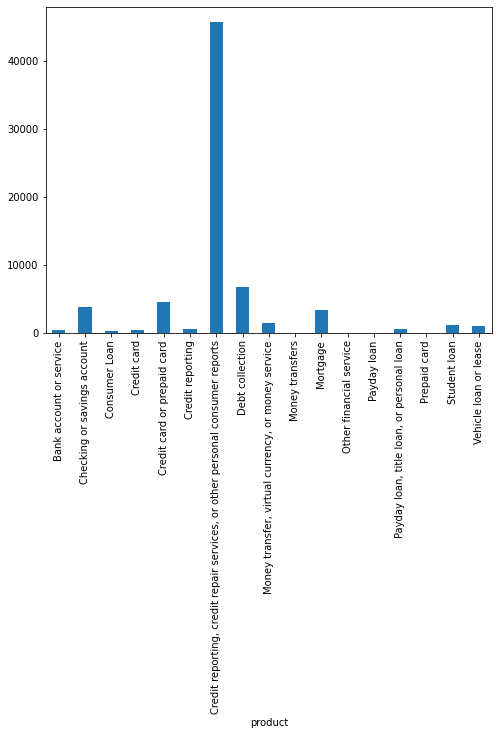

In [12]:
fig = plt.figure(figsize=(8,6))
df.groupby('product').complaint_what_happened.count().plot.bar()
plt.show()

## 2.  Data Preprocessing : Text Processing

format using regex and other tools, punctuation , tokenize, remove stop words
stem and lemmatize the data.


- Data cleaning data using gensim:
   - Removing HTML tags
   - Removing numbers
   - Removing extra whitespaces
   - Removing punctuation
   - Convert all characters to lower case
   - Drop email addresses from the text
   - Tokenize word

- Tokenize Sentence
- Tokenize word
- Removing stopwords


After cleaning operations, need to perform the following:
* Stemming texts
* Lemmatize the texts


## 2.1 Removing punctuation

In [14]:
import gensim
from gensim import models

In [15]:
# Clean data using the built in cleaner in gensim
df['complaint_what_happened_clean'] = df['complaint_what_happened'].apply(lambda x: gensim.utils.simple_preprocess(x))
df.head()

,product,complaint_what_happened,complaint_what_happened_clean
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]"
11,Debt collection,"XXXX is attempting to collect funds for Valuations services not provided or requested- see below. XXXX XXXX, XXXX responded to the false allegation on XX/XX/2022, and requested supporting documentation of XXXX XXXX ( Appraisal ) not provided to XXXX XXXX XXXX \n\n"" We attempted to withdraw the {$5000.00} your business owes on its XXXX XXXX XXXX account but were unsuccessful. So we added a Returned Item fee of {$25.00} to the balance owed. The new total owed is {$5000.00} and due immediately.\n\nIf youve already sent a payment, you can ignore this notice. \n\nHow your business can pay Call us at XXXX to pay over the phone by credit card or check. If you have any questions, you can also chat with us. \n\nOr Click Here to upload a completed payment coupon using our secure portal. \nIf your business can't pay the full amount, call or chat with us to talk about all your options. \n\nYou can also get help managing your business 's XXXX XXXX Payments account in our Merchant Service Center. \n\nThanks, The XXXX XXXX XXXX XXXX account : XXXX Business name : XXXX XXXX, XXXX Case number : XXXX ''","[xxxx, is, attempting, to, collect, funds, for, valuations, services, not, provided, or, requested, see, below, xxxx, xxxx, xxxx, responded, to, the, false, allegation, on, xx, xx, and, requested, supporting, documentation, of, xxxx, xxxx, appraisal, not, provided, to, xxxx, xxxx, xxxx, we, attempted, to, withdraw, the, your, business, owes, on, its, xxxx, xxxx, xxxx, account, but, were, unsuccessful, so, we, added, returned, item, fee, of, to, the, balance, owed, the, new, total, owed, is, and, due, immediately, if, youve, already, sent, payment, you, can, ignore, this, notice, how, your, business, can, pay, call, us, at, xxxx, to, pay, over, the, phone, ...]"
15,"Credit reporting, credit repair services, or other personal consumer reports","Today I called to get my balance and reset my password. The credit card company did not allow me to reset my password or have a reset option sent to my email. They also reported me as not paying since XXXX. There have been several payments since XXXX, there have also been several attempts to login to 

## 2.2. Remove stopwords

In [16]:
import re, nltk
import string

stopword = nltk.corpus.stopwords.words('english')
stopword += ['--', 'xxxx','xx']


def remove_stopwords(sentence):
    text = [word for word in sentence if word not in stopword]
    return text
    
df['text_nostop'] = df['complaint_what_happened_clean'].apply(lambda x: remove_stopwords(x))

df.head()

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]"
11,Debt collection,"XXXX is attempting to collect funds for Valuations services not provided or requested- see below. XXXX XXXX, XXXX responded to the false allegation on XX/XX/2022, and requested supporting documentation of XXXX XXXX ( Appraisal ) not provided to XXXX XXXX XXXX \n\n"" We attempted to withdraw the {$5000.00} your business owes on its XXXX XXXX XXXX account but were unsuccessful. So we added a Returned Item fee of {$25.00} to the balance owed. The new total owed is {$5000.00} and due immediately.\n\nIf youve already sent a payment, you can ignore this notice. \n\nHow your business can pay Call us at XXXX to pay over the phone by credit card or check. If you have any questions, you can also chat with us. \n\nOr Click Here to upload a completed payment coupon using our secure portal. \nIf your business can't pay the full amount, call or chat with us to talk about all your options. \n\nYou can also get help managing your business 's XXXX XXXX Payments account in our Merchant Service Center. \n\nThanks, The XXXX XXXX XXXX XXXX account : XXXX Business name : XXXX XXXX, XXXX Case number : XXXX ''","[xxxx, is, attempting, to, collect, funds, for, valuations, services, not, provided, or, requested, see, below, xxxx, xxxx, xxxx, responded, to, the, false, allegation, on, xx, xx, and, requested, supporting, documentation, of, xxxx, xxxx, appraisal, not, provided, to, xxxx, xxxx, xxxx, we, attempted,

## 2.3 Stemming

In [17]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text =[ps.stem(word) for word in tokenized_text]
    return text

df['text_stemmed'] = df['text_nostop'].apply(lambda x: stemming(x))

df.head()

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]"
11,Debt collection,"XXXX is attempting to collect funds for Valuations services not provided or requested- see below. XXXX XXXX, XXXX responded to the false allegation on XX/XX/2022, and requested supporting documentation of XXXX XXXX ( Appraisal ) not provided to XXXX XXXX XXXX \n\n"" We attempted to withdraw the {$5000.00} your business owes on its XXXX XXXX XXXX account but were unsuccessful. So we added a Returned Item fee of {$25.00} to the balance owed. The new total owed is {$5000.00} and due immediately.\n\nIf youve already sent a payment, you can ignore this notice. \n\nHow your business can pay Call us at XXXX to pay over the phone by credit card or check. If you have any questions, you can also chat with us. \n\nOr Click Here to upload

## 2.4 lemmatizing

In [18]:
import nltk #call WordnetLemmatizer and poterstemmer 

wn = nltk.WordNetLemmatizer()

def lemmatizing(sentence):
    text = [wn.lemmatize(word) for word in sentence]
    return text

df['text_lemmatized'] = df['text_stemmed'].apply(lambda x: lemmatizing(x))

df.head()

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]"
11,Debt collection,"XXXX is attempting to collect funds for Valuations services n

In [19]:
df['length'] = df.apply(lambda x: len(x.complaint_what_happened_clean), axis=1)
df

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized,length
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]",190
11,Debt collection,"XXXX is attempting to collect funds for Valuations

## 2.4 Exploratory Data Analysis
- Visualise the data according to the 'Complaint' character length.
- Using a word cloud find the top 40 words by frequency among all the articles after processing the text

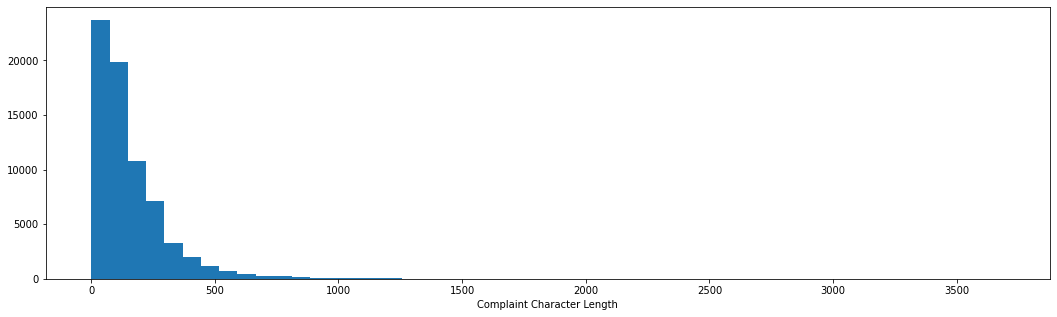

In [20]:
#visualise the data according to the 'Complaint' character length
plt.figure(figsize=(18,5))
plt.hist([l for l in df.length if l < 4000], bins=50)
plt.xlabel("Complaint Character Length")
plt.show()

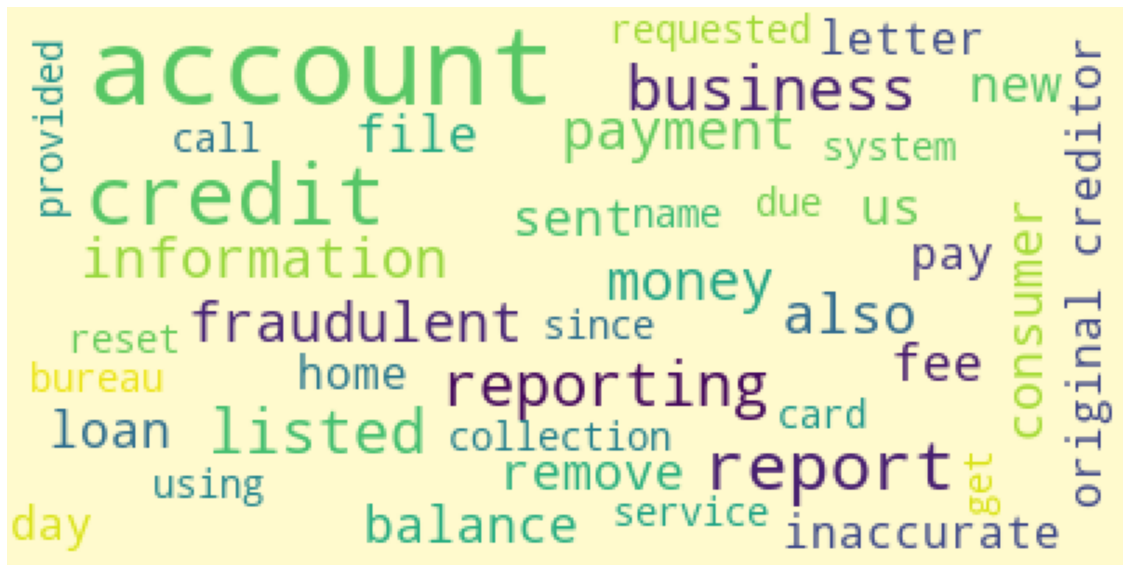

In [21]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(
                          background_color='lemonchiffon',
                          stopwords=stop,
                          max_words=40,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text_nostop']))

fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3. Feature Extraction ( Vectorize data)

Convert the raw texts to a matrix of TF-IDF features

- max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

- min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"

## 3.1 Create a document term matrix using fit_transform

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['--', 'xxxx','xx']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['lenght'] = df['complaint_what_happened_clean'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['complaint_what_happened_clean'].apply(lambda x: count_punct(x))

def clean_text(text):
    sentence = remove_stopwords(text)
    return sentence

#to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(analyzer=clean_text,max_df=0.95, min_df=2, stop_words="english")
dtm = tfidf.fit_transform(df['complaint_what_happened_clean'])


In [24]:
tfidf.vocabulary_

{'hi': 8012,
 'banking': 1633,
 'wells': 18716,
 'fargo': 6554,
 'decade': 4369,
 'within': 18890,
 'past': 12096,
 'years': 19242,
 'grandfather': 7586,
 'started': 16075,
 'sending': 15218,
 'money': 10864,
 'fairly': 6503,
 'frequent': 7183,
 'increments': 8693,
 'rather': 13447,
 'using': 18211,
 'new': 11226,
 'age': 533,
 'free': 7168,
 'transfer': 17408,
 'system': 16708,
 'uses': 18207,
 'old': 11611,
 'fashion': 6569,
 'wire': 18856,
 'transfers': 17418,
 'prefers': 12788,
 'time': 17183,
 'sends': 15219,
 'takes': 16754,
 'service': 15280,
 'fee': 6649,
 'added': 326,
 'dollars': 5355,
 'fees': 6660,
 'run': 14850,
 'process': 12985,
 'little': 10034,
 'costs': 3919,
 'bank': 1626,
 'asked': 1227,
 'funds': 7277,
 'refunded': 13861,
 'incredibly': 8689,
 'excessive': 6227,
 'unwilling': 18106,
 'actually': 308,
 'willing': 18827,
 'refund': 13859,
 'phone': 12381,
 'none': 11303,
 'email': 5732,
 'messages': 10574,
 'shows': 15472,
 'poor': 12599,
 'control': 3753,
 'arbitrar

## 3.2 Topic Modelling using NMF
Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

- Find the best number of clusters
- Apply the best number to create word clusters
- Inspect & validate the correction of each cluster wrt the complaints
- Correct the labels if needed
- Map the clusters to topics/cluster names

#### Manual Topic Modeling
trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are

In [31]:
from sklearn.decomposition import NMF

In [88]:
num_topics = 5 # write the value you want to test out

# keep the random_state = 40
nmf_model = NMF(n_components=num_topics, random_state=40)
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

19301

In [89]:
# Print the Top15 words for each of the topics
for index,topic in enumerate(nmf_model.components_):
    print(f'\033[1mTHE TOP 15 WORDS FOR TOPIC #{index + 1}', '\033[0m')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1 
['act', 'right', 'agency', 'written', 'fair', 'instructions', 'rights', 'furnish', 'privacy', 'accordance', 'violated', 'reporting', 'account', 'states', 'section']


THE TOP 15 WORDS FOR TOPIC #2 
['please', 'reporting', 'bureaus', 'remove', 'date', 'xxxxxxxx', 'identity', 'complaint', 'theft', 'items', 'balance', 'information', 'accounts', 'credit', 'report']


THE TOP 15 WORDS FOR TOPIC #3 
['days', 'please', 'help', 'im', 'debt', 'credit', 'record', 'refused', 'consumers', 'causing', 'attempting', 'low', 'fico', 'transunion', 'score']


THE TOP 15 WORDS FOR TOPIC #4 
['money', 'credit', 'company', 'back', 'payments', 'never', 'received', 'called', 'loan', 'told', 'would', 'card', 'payment', 'bank', 'account']


THE TOP 15 WORDS FOR TOPIC #5 
['report', 'card', 'payment', 'person', 'end', 'open', 'plan', 'treat', 'purpose', 'creditor', 'late', 'may', 'information', 'usc', 'consumer']




In [90]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([3, 3, 3, ..., 0, 3, 1], dtype=int64)

In [91]:
#Assign the best topic to each of the cmplaints in Topic Column
df['Topic'] = topic_results.argmax(axis = 1) 
df.head()

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized,length,lenght,punct%,Topic
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]",190,190,0.0,3
11,Debt collection,"XXXX is attempting t

In [92]:
# Print the first 5 Complaint for each of the Topics
df3 = df.groupby('Topic').head(5)
df3.sort_values('Topic')

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized,length,lenght,punct%,Topic
2039,"Credit reporting, credit repair services, or other personal consumer reports","In accordance with the Fair Credit Reporting act XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXXXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXXXXXX XXXX XXXX XXXX XXXX, XXXX XXXX have violated my rights.\n\n15 U.S.C 1681 section 602 A. States I have the right to privacy.\n\n15 U.S.C 1681 Section 604 A Section 2 : It also states a consumer reporting agency can not furnish a account without my written instructions","[in, accordance, with, the, fair, credit, reporting, act, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxxxxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxxxxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, have, violated, my, rights, section, states, have, the, right, to, privacy, section, section, it, also, states, consumer, reporting, agency, can, not, furnish, account, without, my, written, instructions]","[accordance, fair, credit, reporting, act, xxxxxxxx, xxxxxxxx, violated, rights, section, states, right, privacy, section, section, also, states, consumer, reporting, agency, furnish, account, without, written, instructions]","[accord, fair, credit, report, act, xxxxxxxx, xxxxxxxx, violat, right, section, state, right, privaci, section, section, also, state, consum, report, agenc, furnish, account, without, written, instruct]","[accord, fair, credit, report, act, xxxxxxxx, xxxxxxxx, violat, right, section, state, right, privaci, section, section, also, state, consum, report, agenc, furnish, account, without, written, instruct]",81,81,0.0,0
1745,"Credit reporting, credit repair services, or other personal consumer reports","Under the Fair Credit Reporting Act, they have violated my rights XXXX XXXX XXXX section XXXX A. XXXX I have the right to privacy. \n\nXXXX XXXX XXXX section XXXX A Section XXXX : It also states a consumer reporting agency can not furnish an account without my written instructions XXXX U.S.C XXXX : A creditor XXXX not treat a payment on a credit card account under an open-end consumer credit plan as late for any purpose","[under, the, fair, credit, reporting, act, they, have, violated, my, rights, xxxx, xxxx, xxxx, section, xxxx, xxxx, have, the, right, to, privacy, xxxx, xxxx, xxxx, section, xxxx, section, xxxx, it, also, states, consumer, reporting, agency, can, not, furnish, an, account, without, my, written, instructions, xxxx, xxxx, creditor, xxxx, not, treat, payment, on, credit, card, account, under, an, open, end, consumer, credit, plan, as, late, for, any, purpose]","[fair, credit, reporting, act, violated, rights, section, right, privacy, section, section, also, states, consumer, reporting, agency, furnish, account, without, written, instructions, creditor, treat, payment, credit, card, account, open, end, consumer, credit, plan, late, purpose]","[fair, credit, report, act, violat, right, section, right, privaci, section, section, also, state, consum, report, agenc, furnish, account, without, written, instruct, creditor, treat, payment, credit, card, account, open, end, consum, credit, plan, late, purpos]","[fair, credit, report, act, violat, right, section, right, privaci, section, section, also, state, consum, report, agenc, furnish, account, without, written, instruct, creditor, treat, payment, credit, card, account, open, end, consum, credit, plan, late, purpos]",67,67,0.0,0
1724,"Credit reporting, credit repair services, or other personal consumer reports","In accordance with the fair credit reporting act XXXX account XXXX XXXX # XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX

After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
- Credit reporting, credit repair services, or other personal consumer reports
- Checking or savings account
- Mortgage
- Debt collection


In [93]:
import warnings as warnings
warnings.filterwarnings("ignore")

# Create the dictionary of Topic names and Topics
Topic_names = {0:"Credit reporting, credit repair services, or other personal consumer reports",
               1:"Debt collection", 
               2:"Credit card or prepaid card",
               3:"Mortgage",
               4: 'Money transfer, virtual currency, or money service'}

# Replace Topics with Topic Names
df['Topic'] = df['Topic'].map(Topic_names)
df

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized,length,lenght,punct%,Topic
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]",190,190,0.0,Mortgage
11,Debt collection,"XXXX is attem

### 3.3 Encoding Categorical Variables for the product

In [148]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

df['Topic'] = encoder.fit_transform(df['product'])
df

,product,complaint_what_happened,complaint_what_happened_clean,text_nostop,text_stemmed,text_lemmatized,length,lenght,punct%,Topic
3,Checking or savings account,"Hi, I have been banking with Wells Fargo for over a decade. Within the past 2 years, my grandfather started me sending me money in fairly frequent increments. Rather than using a new age, free transfer system, he uses old fashion wire transfers because he is over XXXX XXXX XXXX and this is what he prefers. \n\nEach time he sends me money, Wells Fargo takes a {$16.00} service fee. Over the past 2 or so years, this has added up to {$490.00} dollars in fees, to run a process with little to no costs to the bank. I asked to have some or all of the funds refunded because these fees are incredibly excessive, but they were unwilling to do so ( they actually were willing to refund some of the money over the phone but then none of the money over email/messages, which shows poor process control and an arbitrary system of refunds ) This feels excessive. They are basically taking money from my grandfather since he is too old to learn how to use new systems. Feels like this matches a pattern that Wells Fargo has exhibited the past few years of taking money from clients in made up fees.","[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]","[hi, banking, wells, fargo, decade, within, past, years, grandfather, started, sending, money, fairly, frequent, increments, rather, using, new, age, free, transfer, system, uses, old, fashion, wire, transfers, prefers, time, sends, money, wells, fargo, takes, service, fee, past, years, added, dollars, fees, run, process, little, costs, bank, asked, funds, refunded, fees, incredibly, excessive, unwilling, actually, willing, refund, money, phone, none, money, email, messages, shows, poor, process, control, arbitrary, system, refunds, feels, excessive, basically, taking, money, grandfather, since, old, learn, use, new, systems, feels, like, matches, pattern, wells, fargo, exhibited, past, years, taking, money, clients, made, fees]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]","[hi, bank, well, fargo, decad, within, past, year, grandfath, start, send, money, fairli, frequent, increment, rather, use, new, age, free, transfer, system, use, old, fashion, wire, transfer, prefer, time, send, money, well, fargo, take, servic, fee, past, year, ad, dollar, fee, run, process, littl, cost, bank, ask, fund, refund, fee, incred, excess, unwil, actual, will, refund, money, phone, none, money, email, messag, show, poor, process, control, arbitrari, system, refund, feel, excess, basic, take, money, grandfath, sinc, old, learn, use, new, system, feel, like, match, pattern, well, fargo, exhibit, past, year, take, money, client, made, fee]",190,190,0.0,1
11,Debt collection,"XXXX is attempting t

In [149]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df[["complaint_what_happened_clean","Topic"]]
training_data

,complaint_what_happened_clean,Topic
3,"[hi, have, been, banking, with, wells, fargo, for, over, decade, within, the, past, years, my, grandfather, started, me, sending, me, money, in, fairly, frequent, increments, rather, than, using, new, age, free, transfer, system, he, uses, old, fashion, wire, transfers, because, he, is, over, xxxx, xxxx, xxxx, and, this, is, what, he, prefers, each, time, he, sends, me, money, wells, fargo, takes, service, fee, over, the, past, or, so, years, this, has, added, up, to, dollars, in, fees, to, run, process, with, little, to, no, costs, to, the, bank, asked, to, have, some, or, all, of, the, funds, refunded, because, these, ...]",1
11,"[xxxx, is, attempting, to, collect, funds, for, valuations, services, not, provided, or, requested, see, below, xxxx, xxxx, xxxx, responded, to, the, false, allegation, on, xx, xx, and, requested, supporting, documentation, of, xxxx, xxxx, appraisal, not, provided, to, xxxx, xxxx, xxxx, we, attempted, to, withdraw, the, your, business, owes, on, its, xxxx, xxxx, xxxx, account, but, were, unsuccessful, so, we, added, returned, item, fee, of, to, the, balance, owed, the, new, total, owed, is, and, due, immediately, if, youve, already, sent, payment, you, can, ignore, this, notice, how, your, business, can, pay, call, us, at, xxxx, to, pay, over, the, phone, ...]",7
15,"[today, called, to, get, my, balance, and, reset, my, password, the, credit, card, company, did, not, allow, me, to, reset, my, password, or, have, reset, option, sent, to, my, email, they, also, reported, me, as, not, paying, since, xxxx, there, have, been, several, payments, since, xxxx, there, have, also, been, several, attempts, to, login, to, no, avail, the, company, is, engaging, in, illegal, collection, and, credit, reporting, have, proof, of, payments, made, over, the, last, xxxx, months, and, have, not, been, skipping, payments]",6
51,"[the, federal, trade, commission, bureau, of, consumer, protection, has, received, numerous, complaints, from, xxxx, xxxx, xxxx, dob, xx, xx, ssn, xxxx, in, regards, to, fraudulent, credit, card, accounts, debt, collection, accounts, and, an, inaccurate, public, record, reappearing, on, xxxx, xxxx, xxxx, and, xxxx, credit, report, xxxx, xxxx, has, sent, xxxx, and, xxxx, countless, letters, of, dispute, for, the, following, accounts, reappearing, on, his, xxxx, and, xxxx, credit, report, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, xxxx, bankruptcy, xxxx, xxxx, discharged, from, the, district, court, minnesota, bankruptcy, court, but, xxxx, and, xxxx, has, failed, ...]",6
56,"[we, applied, for, home, loan, using, agent, xxxx, xxxx, license, xxxx, and, were, pre, approved, we, had, meeting, with, xxxx, and, expressed, concern, that, another, mortgage, lender, had, denied, our, loan, he, said, he, personally, reviewed, our, file, and, there, were, no, concerns, on, the, day, we, were, supposed, to, close, xxxx, said, there, were, delays, due, to, the, other, parties, involved, we, responded, promptly, to, every, request, from, his, team, in, an, effort, to, expedite, during, this, time, xxxx, was, difficult, to, reach, finally, days, after, we, were, supposed, to, close, xxxx, sent, text, at, xxxx, saying, the, loan, ...]",10
...,...,...
205064,"[the, inquiries, and, information, listed, in, my, report, were, inaccurate, requested, that, they, investigate, it, and, analyze, my, files, by, sending, letters, to, all, three, credit, bureaus, the, reality, that, this, information, continues, to, be, sent, around, is, affecting, my, credit, the, credit, agency, didn, do, anything, to, remove, the, inaccurate, information, and, inquiries, listed, below, as, result, inaccurate, name, xxxx, xxxx, xxxx, previous, address, xxxx, xxxx, xxxx, xxxx, xxxx, md, xxxx, inquires, xxxx, xx, xx, xxxx, xxxx, xxxx, xx, xx, xxxx, xxxx, xx, xx, xxxx]",6
205070,"[im, submitting, complaint, to, you, today, to, inform, you, was, the, victim, of, id

# 4. Create and transform features 

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_train_counts = count_vect.fit_transform(df['complaint_what_happened_clean'])

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

## 4.1 Splitting Data into Training and Test Sets

In [151]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

#checking train data set size
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52579, 34518)
(52579,)
(17527, 34518)
(17527,)


# 5. Select 2 algorithms and build 2 models
## 5.1 Model selection : Logistic Regression

In [152]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import time

In [116]:
lr = LogisticRegression(solver='sag', max_iter=1000, tol=5)

start = time.time()
lr_model = lr.fit(X_train, y_train)
end = time.time()
fit_time_lr = (end - start)

start = time.time()
y_pred = lr_model.predict(X_test)
end = time.time()
pred_time_lr = (end - start)
precision_lr, recall_lr, fscore_lr, train_support_lr = score(y_test, y_pred, average='micro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {} '.format(
    round(fit_time_lr, 3), round(pred_time_lr, 3), round(precision_lr, 3), round(recall_lr, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.277 / Predict time: 0.016 ---- Precision: 0.858 / Recall: 0.858 / Accuracy: 0.858 


## 5.2 Model selection : Random Forest Classifier

In [117]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time_rf = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time_rf = (end - start)
precision_rf, recall_rf, fscore_rf, train_support_rf = score(y_test, y_pred, average='micro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {} '.format(
    round(fit_time_rf, 3), round(pred_time_rf, 3), round(precision_rf, 3), round(recall_rf, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 66.834 / Predict time: 0.358 ---- Precision: 0.825 / Recall: 0.825 / Accuracy: 0.825 


## 5.3 Model Performance Comparison

In [118]:
# from sklearn.metrics import precision_score, recall_score, f1_score


Model_Names = ['Logistic Regression', 'Random Forest',]
scores = [fscore_lr, fscore_rf]
precision = [precision_lr,precision_rf]
recall = [recall_lr, recall_rf]
F1 = [fscore_lr,fscore_rf] 
fit_time = [fit_time_lr,fit_time_rf]
pred_time = [pred_time_lr,pred_time_rf]


In [119]:
report_df = pd.DataFrame()

report_df['Model Classifiers'] = Model_Names
report_df['Fit Time'] = fit_time
report_df['Prediction Time'] = pred_time
report_df['Accuracy'] = scores
report_df['Precision'] = precision
report_df['Recall'] = recall
report_df['F1'] = F1


In [120]:
import seaborn as sns

sns.set_theme()
CM = sns.color_palette("light:b", as_cmap=True)
report_df.style.background_gradient(cmap=CM)

,Model Classifiers,Fit Time,Prediction Time,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.277058,0.015708,0.857819,0.857819,0.857819,0.857819
1,Random Forest,66.834464,0.357579,0.825070,0.825070,0.825070,0.825070


Observation : As observed in the model comparison figure above, the model that performed well is the logisti regression with best time, prediction, high accuracy, precision and recall score compared to random forest model.

## 5.4 Optimisation Logistic Regression on tuned hyperparameters

In [124]:

lr_tune = LogisticRegression(C=1, penalty='l1',solver='saga', max_iter=1000)

start = time.time()
lr_model_tune = lr_tune.fit(X_train, y_train)
end = time.time()
fit_time_lrt = (end - start)

start = time.time()
pred =X_test[0]
y_pred_lr_tune = lr_model_tune.predict(X_test)
end = time.time()
pred_time_lrt = (end - start)
precision_lrt, recall_lrt, fscore_lrt, train_support_lrt = score(y_test, y_pred_lr_tune, average='micro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {} '.format(
    round(fit_time_lrt, 3), round(pred_time_lrt, 3), round(precision_lrt, 3), round(recall_lrt, 3), round((y_pred_lr_tune==y_test).sum()/len(y_pred_lr_tune), 3)))

Fit time: 284.444 / Predict time: 0.052 ---- Precision: 0.865 / Recall: 0.865 / Accuracy: 0.865 


In [125]:
# Create a dataframe to store F1 Scores of all models we will build
summary = pd.DataFrame([{'Model': 'Logistic Regression','F1 Score (untuned)': round(fscore_lr, 2), 'F1 Score (tuned)': round(fscore_lrt, 2)}])
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.86,0.87


Observation, as observed the optimised logic regression model is working well though its only slight increased in the performance.

# 6. Make predictions & evaluate the results

In [156]:

# Function to predict a topic for given text
def predict_topic(text):
    
    target_names = ["Credit reporting, credit repair services, or other personal consumer reports", "Debt collection", "Credit card or prepaid card", "Checking or savings accoun", 
                    "Money transfer, virtual currency, or money service","Mortgage","Student loan","Consumer Loan",
                    "Credit card","Payday loan, title loan, or personal loan","Prepaid card"
                   ]

    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = lr_model_tune.predict(X_new_counts)
    return target_names[predicted[0]]


In [157]:
# Create a dataframe of some sample customer complaints
df_new = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})
df_new

,complaints
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs"
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.
2,I want to open a salary account at your downtown branch. Please provide me the procedure.
3,"Yesterday, I received a fraudulent email regarding renewal of my services."
4,What is the procedure to know my CIBIL score?
5,I need to know the number of bank branches and their locations in the city of Dubai


In [158]:
# Create a new column of predicted topics of each complaint, predicted using the tuned Logistic Regression model
df_new['predicted topic'] = df_new['complaints'].apply(lambda x: predict_topic([x]))
df_new

,complaints,predicted topic
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Student loan
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Student loan
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Student loan
3,"Yesterday, I received a fraudulent email regarding renewal of my services.",Student loan
4,What is the procedure to know my CIBIL score?,Student loan
5,I need to know the number of bank branches and their locations in the city of Dubai,Student loan


With the new complaints data, the model predicted that the complaints topic is tag to a Student Loan topic. So this way, model was able to classify to which category annd the team who is handling the case will know immediately. 

## 6.1 Cross validate model
To compute a better estimate of model performance,  perform simple cross validation. The code in the cell performs the following processing:

- Create a list of the metrics to be computed for each fold.
- Defines a logistic regression model object.
- A 10 fold cross validation is performed using the cross_validate function from the scikit-learn model_selection package.

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#evaluation - baselines
num_folds = 10

scoring = 'accuracy'
models = []
models.append(('Logistic Regression', LogisticRegression(C=1, penalty='l1',solver='saga', max_iter=1000)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression 0.857643 0.003104 
Random Forest 0.772476 0.005509 


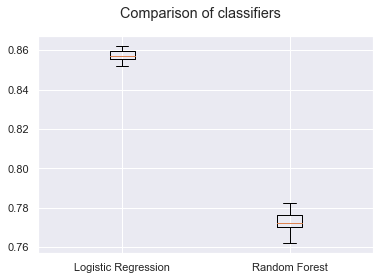

In [162]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The Kfold results shows that Logistic still peromed as expected at 86% accuracy. however, the random forest performance is not good as it down to 77% accuracy.

# 7. Select one final model & explain why you want to select this particular model as the final model.

## Summary

According to algorith and model metric result analysis, Logistic Regression model is the best performance with the metric  85.8% precison, 85.8% recall and 85.8% accuracy. 0.28 fit time and 0.016 prediction time for a deafult clasifier. while the Random Forest metric analaysis shows 83% precison, 83% recall and 83% accuracy. 66.83 fit time and 0.35 prediction time. It's clearly I can tell that  Logistic Regression perform well. And then, I've tried to perfom optimisation in the Logistic Regression and it turn's out to have a good result eventhough its only having slighlty performance improvement.

I've tried to run the cross validation with 10 KFold, and the final result is the logistic regression, the perfomance stays at 85% accuracy while the random forest model hasn't performing well and down to 77%.

So, it truely that Logistic Regression model is the final model I've selected.

